Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 2s 2s/step


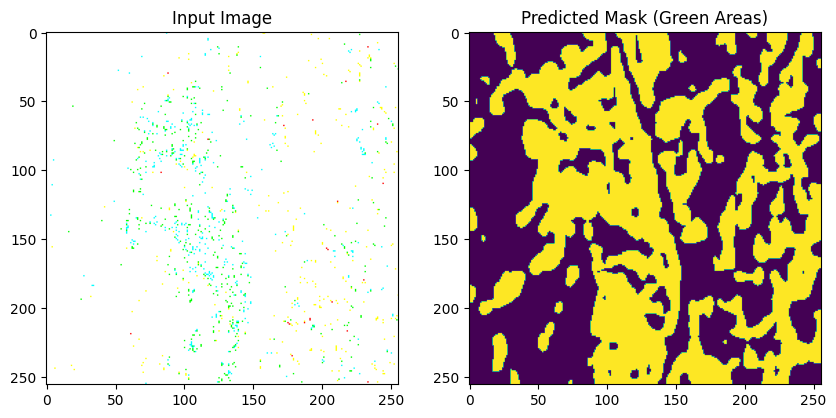

In [4]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model_path = '/content/drive/MyDrive/deeplabv3pus_newcustomdataset.h5'  # Replace with your model's file path
model = load_model(model_path)
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
# Load the input image from your Google Drive
#input_image_path = '/content/drive/MyDrive/images/3484_sat_61.jpg'  # Replace with your input image's file path
input_image_path = '/content/drive/MyDrive/Sowmik Dataset/Planned_way/Park all processed data/Preprocessed park/Geleb park-2005.jpg'  # Replace with your input image's file path
input_image = imread(input_image_path)[:, :, :3]  # Assuming 3 channels (RGB)
input_image = resize(input_image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#input_image = input_image / 255.0  # Normalize the image

# Reshape the input image for prediction
input_image = np.expand_dims(input_image, axis=0)

# Predict green areas in the input image
predictions = model.predict(input_image)

# Threshold the predictions to obtain binary masks
#predicted_mask = (predictions > 0.8).astype(np.uint8)
predicted_mask = (predictions > 0.5).astype(np.uint8)

# Display the input image and the predicted mask (green areas)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image[0])
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(resize(predicted_mask[0, ..., 0], (input_image.shape[1], input_image.shape[2]), mode='constant'), cmap='viridis')
plt.title("Predicted Mask (Green Areas)")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
